# [**Une démo de clustering hiérarchique Ward structuré sur une image de pièces**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/2_3_cluster/plot_ward_structured_vs_unstructured.ipynb)<br/>([*Hierarchical clustering: structured vs unstructured ward*](https://scikit-learn.org/stable/auto_examples/cluster/plot_ward_structured_vs_unstructured.html))

L'exemple construit un jeu de données swiss roll et exécute un clustering hiérarchique sur leur position.

Pour plus d'informations, consultez [**Clustering hiérarchique** (2.3.6)](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering).

Dans un premier temps, le clustering hiérarchique est effectué sans contraintes de connectivité sur la structure et est uniquement basé sur la distance, alors que dans un second temps le clustering est restreint au graphe des k plus proches voisins : c'est un clustering hiérarchique à priori de structure.

Certains des clusters appris sans contraintes de connectivité ne respectent pas la structure du rouleau suisse et s'étendent sur différents plis des variétés. A l'inverse, face aux contraintes de connectivité, les clusters forment une belle parcellisation de la rouelle.

In [1]:
# Authors : Vincent Michel, 2010
#           Alexandre Gramfort, 2010
#           Gael Varoquaux, 2010
# License: BSD 3 clause

import time as time

# The following import is required
# for 3D projection to work with matplotlib < 3.2

import mpl_toolkits.mplot3d  # noqa: F401

import numpy as np

# Génération du jeu de données

Nous commençons par générer le jeu de données Swiss Roll.

In [2]:
from sklearn.datasets import make_swiss_roll

n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)
# Make it thinner
X[:, 1] *= 0.5

# Calcul du regroupement

Nous effectuons AgglomerativeClustering qui relève du Hierarchical Clustering sans aucune contrainte de connectivité.

In [3]:
from sklearn.cluster import AgglomerativeClustering

print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Elapsed time: {elapsed_time:.2f}s")
print(f"Number of points: {label.size}")

Compute unstructured hierarchical clustering...
Elapsed time: 0.07s
Number of points: 1500


# Affichage du résultat

Affichage des clusters hiérarchiques non structurés.

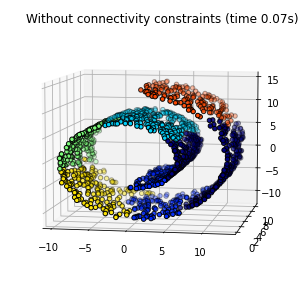

In [4]:
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=-80)
ax1.set_position([0, 0, 0.95, 1])
for l in np.unique(label):
    ax1.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )
_ = fig1.suptitle(f"Without connectivity constraints (time {elapsed_time:.2f}s)")